# Analysing OSM history using Ohsome

This notebook contains a simple example of an OHSOME request. In order to send a request to the server from within python, we need the requests package.  

In [1]:
import requests
import pandas as pd
import datetime as dt
%matplotlib inline 

This is the url that we will send our queries to.

In [2]:
ohsome_url = 'https://api.ohsome.org/v0.9-ignite-germany/'

New we need to specify our query. Refer to the [Ohsome Documentation for Data Aggregation](https://api.ohsome.org/v0.9-ignite-germany/swagger-ui.html?urls.primaryName=dataAggregation#/elementsCount) to find the right query type and parameters.

In this example, we would like to get the count of restaurants within an area of interest. Therefore, we append `elements/count/` to the url. Make sure not to omit a slash.

In [3]:
count_ohsome_endpoint = ohsome_url + 'elements/count/'
count_ohsome_endpoint

'https://api.ohsome.org/v0.9-ignite-germany/elements/count/'

Then, we define some parameters of our query and store them all in a dictionary. 

In [78]:
start_date = '2008-10-01'
end_date = '2018-08-01' # should not be after 2018-08-01
time_interval = 'P1Y'  # Yearly interval, for monthly interval use P1M, for two montly interval use P2M
keys = "amenity"
values = "restaurant"
types= ['way', 'node']
boundingBox = "8.8057, 53.0713, 8.8306, 53.0848"

In [79]:
data = {'bboxes': boundingBox,
        'keys': keys,
        'values': values,
        'types' : ",".join(types),
        'time': f'{start_date}/{end_date}/{time_interval}',
        #'time': f'{end_date}',
        'showMetadata': 'true'}

Now we are ready to send our query to the ohsome server.

In [80]:
ohsomeResponse = requests.post(count_ohsome_endpoint, data=data).json()

Let's look at the result.

In [81]:
type(ohsomeResponse)

dict

In [82]:
ohsomeResponse

{'attribution': {'url': 'https://ohsome.org/copyrights',
  'text': '© OpenStreetMap contributors'},
 'apiVersion': '0.9',
 'metadata': {'executionTime': 605,
  'description': 'Total count of items in absolute values.'},
 'result': [{'timestamp': '2008-10-01T00:00:00Z', 'value': 31.0},
  {'timestamp': '2009-10-01T00:00:00Z', 'value': 34.0},
  {'timestamp': '2010-10-01T00:00:00Z', 'value': 53.0},
  {'timestamp': '2011-10-01T00:00:00Z', 'value': 61.0},
  {'timestamp': '2012-10-01T00:00:00Z', 'value': 64.0},
  {'timestamp': '2013-10-01T00:00:00Z', 'value': 74.0},
  {'timestamp': '2014-10-01T00:00:00Z', 'value': 92.0},
  {'timestamp': '2015-10-01T00:00:00Z', 'value': 98.0},
  {'timestamp': '2016-10-01T00:00:00Z', 'value': 104.0},
  {'timestamp': '2017-10-01T00:00:00Z', 'value': 111.0}]}

As we can see, the `ohsome_result` is a dictionary. (For some information about Python dictionaries see https://www.w3schools.com/python/python_dictionaries.asp) We also notice that the result of the query which we are interested in is stored in the 'result' key of the dictionary. However, this is still not very readable and we cannot analyse the data like that. So we will store the result of the query in a dataframe using the Python package 'pandas'.

In [83]:
df = pd.DataFrame(ohsomeResponse['result'])
df.timestamp = pd.to_datetime(df.timestamp, format='%Y-%m-%dT%H:%M:%SZ')
df.set_index('timestamp')
df.head() # only print first rows of data frame. 
# df  # prints the whole data frame

,timestamp,value
0,2008-10-01,31.0
1,2009-10-01,34.0
2,2010-10-01,53.0
3,2011-10-01,61.0
4,2012-10-01,64.0


Mucht better. But are the results correct? Let's verify it by passing the same query to the [Ohsome dashboard](https://ohsome.org/apps/dashboard/). We will compare the counts for January 2018. In the dashboard it says there are 112 restaurants. Let's see what our result says.

In [84]:
target_date = dt.datetime.strptime("2015-10-01", "%Y-%m-%d")
df[df.timestamp == target_date]

,timestamp,value
7,2015-10-01,98.0


Great! Our results match. Last step, making a nice plot.

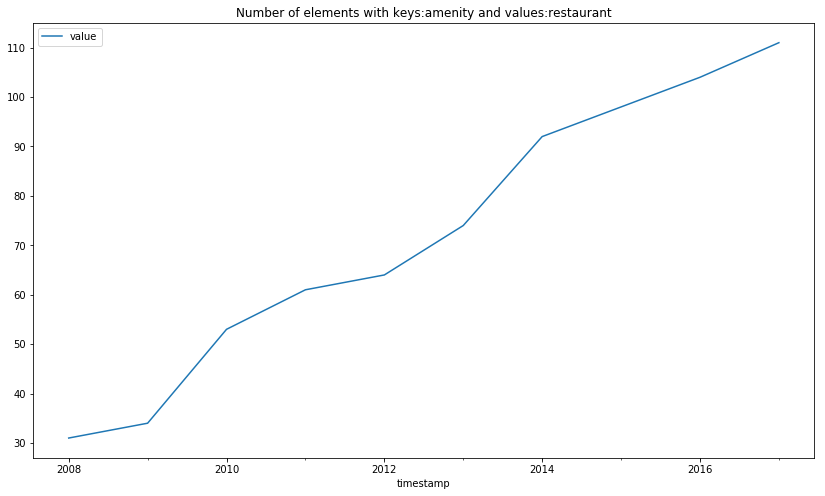

In [85]:
df.plot(x="timestamp", y=df.columns[1], figsize=(14,8), title="Number of elements with keys:{} and values:{}".format(keys,values))